In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [ ]:
line = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(line, line)
grid = np.vstack((xx.flatten(), yy.flatten())).T
x_values = grid[:, 0]
y_values = grid[:, 1]

z_values = x_values ** 2 + y_values ** 2

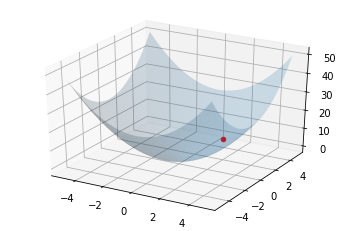

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
    x_values, y_values, z_values, linewidth=0.2, antialiased=True, alpha=0.2)
ax.scatter([2], [2], [8], c='red');

In [ ]:
# ∇f = (2x, 2y)
# u* = ∇f(2,2) / |∇f(2,2)| = (1/√2, 1/√2)

steepest_ascent_x = 2 + 1 / np.sqrt(2)
steepest_ascent_y = 2 + 1 / np.sqrt(2)
highest_f = steepest_ascent_x ** 2 + steepest_ascent_y ** 2
highest_f

14.65685424949238

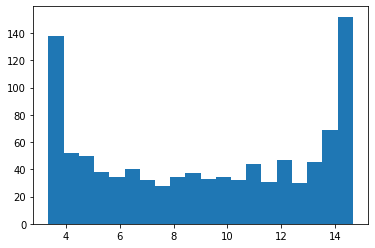

In [ ]:
# randomly generate other unit vectors to see if we can beat steepest descent
# recall (polar coordinates):
# x = (rcosθ, rsinθ), but r = 1
# u = (cosθ, sinθ)
angles = np.random.random(1000) * 2 * np.pi
other_f_values = (2 + np.cos(angles)) ** 2 + (2 + np.sin(angles)) ** 2

# plot a histogram of other f values
plt.hist(other_f_values, bins=20);

In [ ]:
np.any(other_f_values > highest_f)

False

In [ ]:
# draw arrows on the 3-d plot
class Arrow3D(FancyArrowPatch):
  def __init__(self, xs, ys, zs, *args, **kwargs):
    FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
    self._verts3d = xs, ys, zs

  def draw(self, renderer):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self, renderer)
  
  def do_3d_projection(self, renderer=None):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

    return np.min(zs)

def add_arrow(ax, p1, p2):
  x = [p1[0], p2[0]]
  y = [p1[1], p2[1]]
  z = [p1[2], p2[2]]
  arw = Arrow3D(x, y, z,
                arrowstyle="->", color="purple", lw=1, mutation_scale=25)
  ax.add_artist(arw)

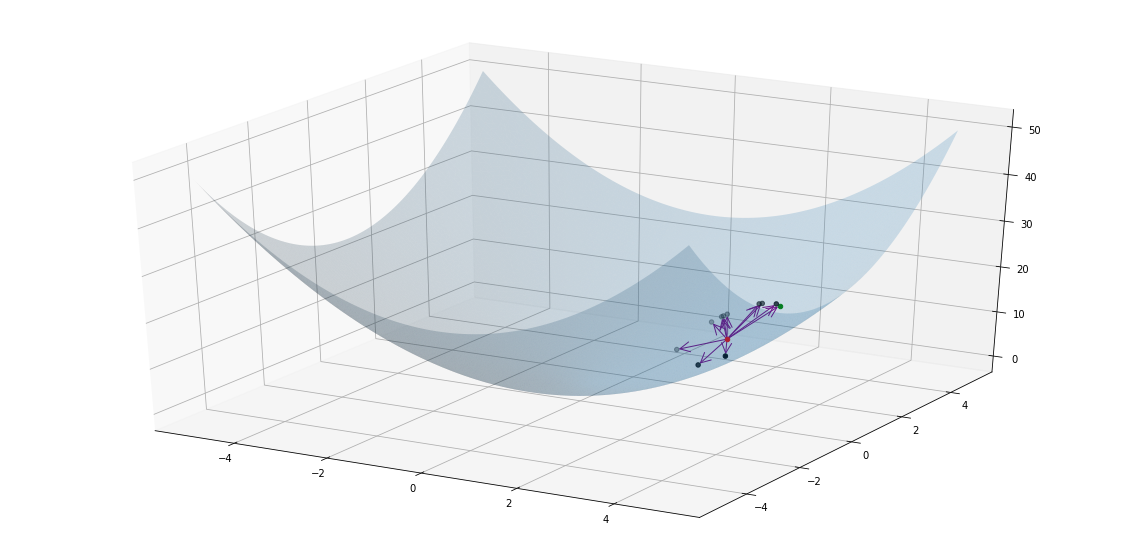

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
    x_values, y_values, z_values, linewidth=0.2, antialiased=True, alpha=0.2)

# original point
ax.scatter([2], [2], [8], c='red')
p0 = [2, 2, 8]

# steepest increase
ax.scatter([steepest_ascent_x], [steepest_ascent_y], [highest_f], c='green')
p = [steepest_ascent_x, steepest_ascent_y, highest_f]
add_arrow(ax, p0, p)

# other random points
angles_sample = np.random.choice(angles, size=10, replace=False)

# convert to x, y
other_x = 2 + np.cos(angles_sample)
other_y = 2 + np.sin(angles_sample)
other_f = other_x ** 2 + other_y ** 2
ax.scatter(other_x, other_y, other_f, c='black')

for p in zip(other_x, other_y, other_f):
  add_arrow(ax, p0, p)

plt.show()

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=KAHmaQAnZ5YL60VOLHThGA&n=Steepest+Ascent)